# **Installing Spark**

In [16]:
!pip install pyspark==3.2

# **start spark sessnon and configureation**

In [17]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
spark = SparkSession.builder.master("local[2]").appName("dat").getOrCreate()
sc = spark.sparkContext
#create an instance of SQLContext
sqlContext = SQLContext(spark)

/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


# **Importing necessary Libraries**

In [18]:
from io import StringIO
from collections import namedtuple
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.functions import *

import csv
import matplotlib.pyplot as plt
import seaborn as sas
import pandas as pd
import numpy as np

# **Loading Data**

In [19]:
Titanic = pd.read_csv('/kaggle/input/titanic-data/TitanicData1.csv')
Titanic.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


# **Data info**

In [20]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Printing Data before processing**

In [21]:
print(Titanic.head())
print(Titanic.tail())
print(Titanic.dtypes)

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0  
  

In [22]:
print(Titanic.shape)

(891, 12)


# **Checking Missing Values**

In [23]:
Titanic.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

# Data Cleaning

# **Removing Unwanted Columns**

In [24]:
Titanic = Titanic.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [25]:
Titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,1
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0


# **Fill Missing Values**

In [26]:
Titanic['Age'] = Titanic['Age'].fillna(Titanic['Age'].mean())

Titanic.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Survived       0
dtype: int64

In [27]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     889 non-null    object 
 8   Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [28]:
Titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,1
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0


# Data Normalisation

In [29]:
Titanic['Sex'] = Titanic['Sex'].map( {'male':1,'female':0})

In [30]:
Titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,1,22.0,1,0,7.2500,S,0
1,2,1,0,38.0,1,0,71.2833,C,1
2,3,3,0,26.0,0,0,7.9250,S,1
3,4,1,0,35.0,1,0,53.1000,S,1
4,5,3,1,35.0,0,0,8.0500,S,0


In [31]:
Titanic['Embarked'] = Titanic['Embarked'].map({'Q': 2, 'S': 1, 'C': 0})

mean_embarked = Titanic['Embarked'].mean()
Titanic['Embarked'].fillna(mean_embarked,inplace=True)

/tmp/ipykernel_33/2461733351.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Titanic['Embarked'].fillna(mean_embarked,inplace=True)


In [32]:
Titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,1,22.0,1,0,7.2500,1.0,0
1,2,1,0,38.0,1,0,71.2833,0.0,1
2,3,3,0,26.0,0,0,7.9250,1.0,1
3,4,1,0,35.0,1,0,53.1000,1.0,1
4,5,3,1,35.0,0,0,8.0500,1.0,0


In [33]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    float64
 8   Survived     891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


# **Visualisation**

# **Survival Count**

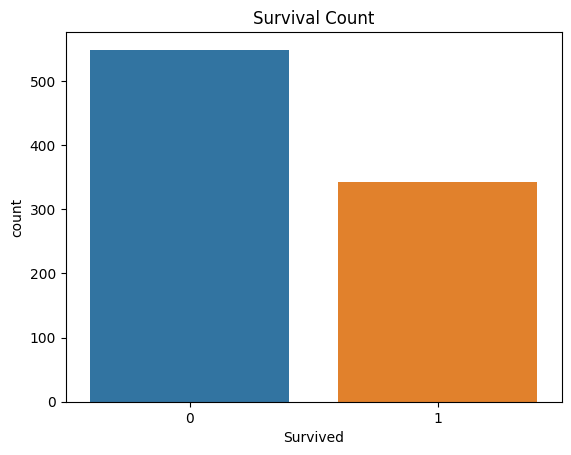

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=Titanic)
plt.title('Survival Count')
plt.show()


# **Age Distribution**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


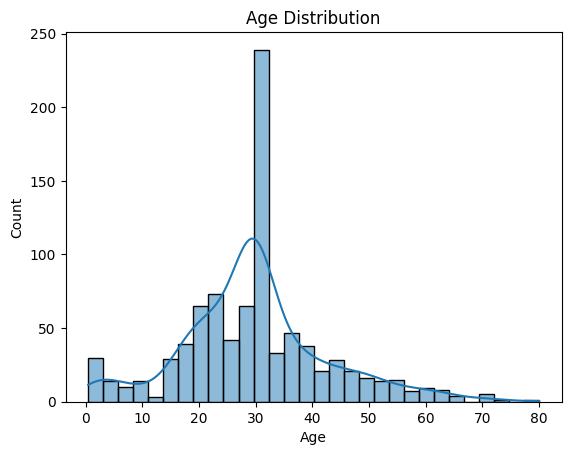

In [35]:
sns.histplot(Titanic['Age'], kde=True)
plt.title('Age Distribution')
plt.show()


# **Fare Distribution**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


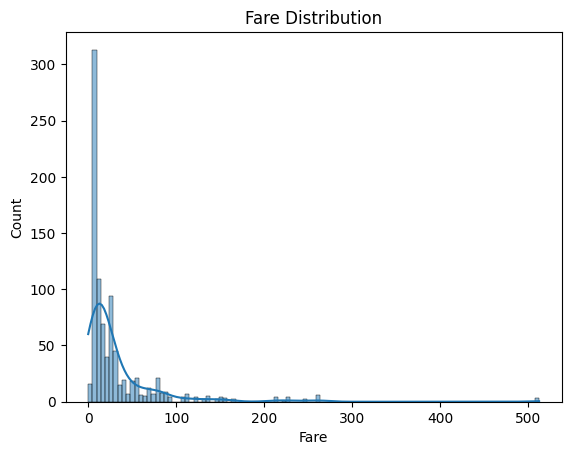

In [36]:
sns.histplot(Titanic['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()


# **Survival by Class**

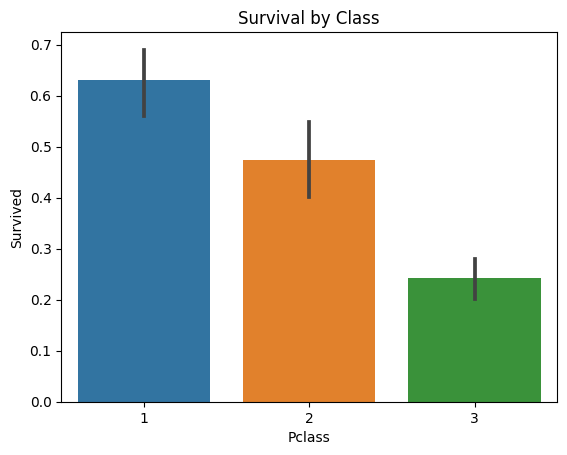

In [37]:
sns.barplot(x='Pclass', y='Survived', data=Titanic)
plt.title('Survival by Class')
plt.show()

# **Survival by Gender**

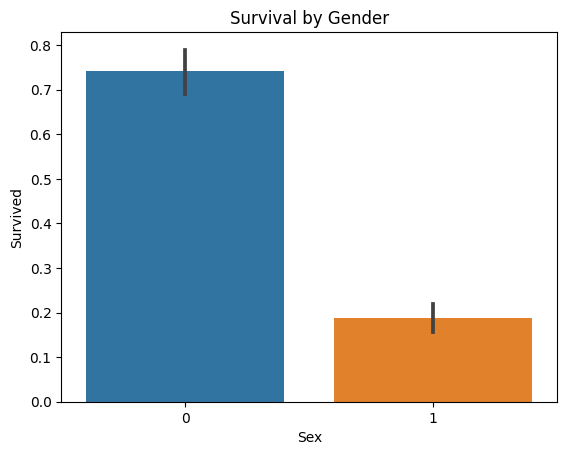

In [38]:
sns.barplot(x='Sex', y='Survived', data=Titanic)
plt.title('Survival by Gender')
plt.show()


# **Survival Rate by Age Groups**

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


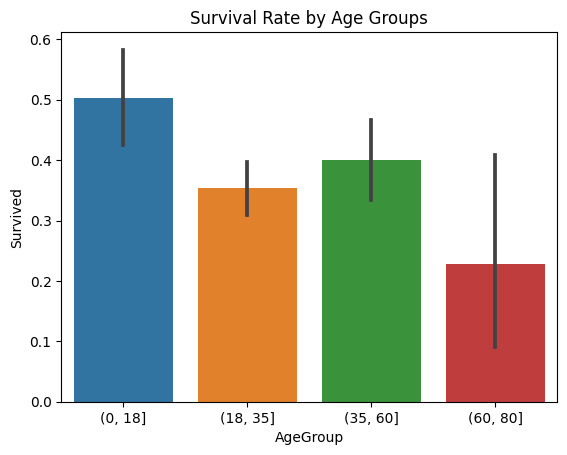

In [39]:
Titanic['AgeGroup'] = pd.cut(Titanic['Age'], bins=[0, 18, 35, 60, 80])
sns.barplot(x='AgeGroup', y='Survived', data=Titanic)
plt.title('Survival Rate by Age Groups')
plt.show()


# **Pair Plot**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

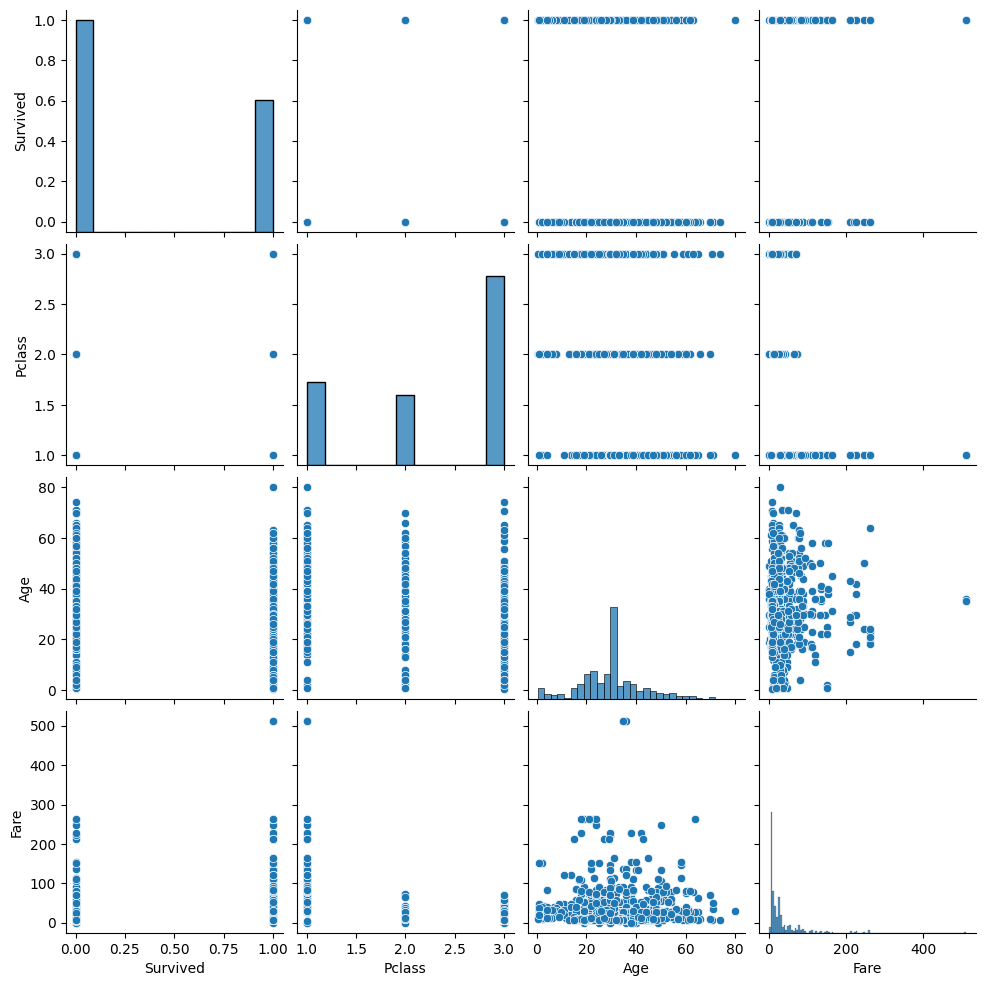

In [40]:
sns.pairplot(Titanic[['Survived', 'Pclass', 'Age', 'Fare']])
plt.show()


In [41]:
Titanic = Titanic.drop(columns = ['AgeGroup'], axis=1)

In [42]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    float64
 8   Survived     891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


# **Heatmap**

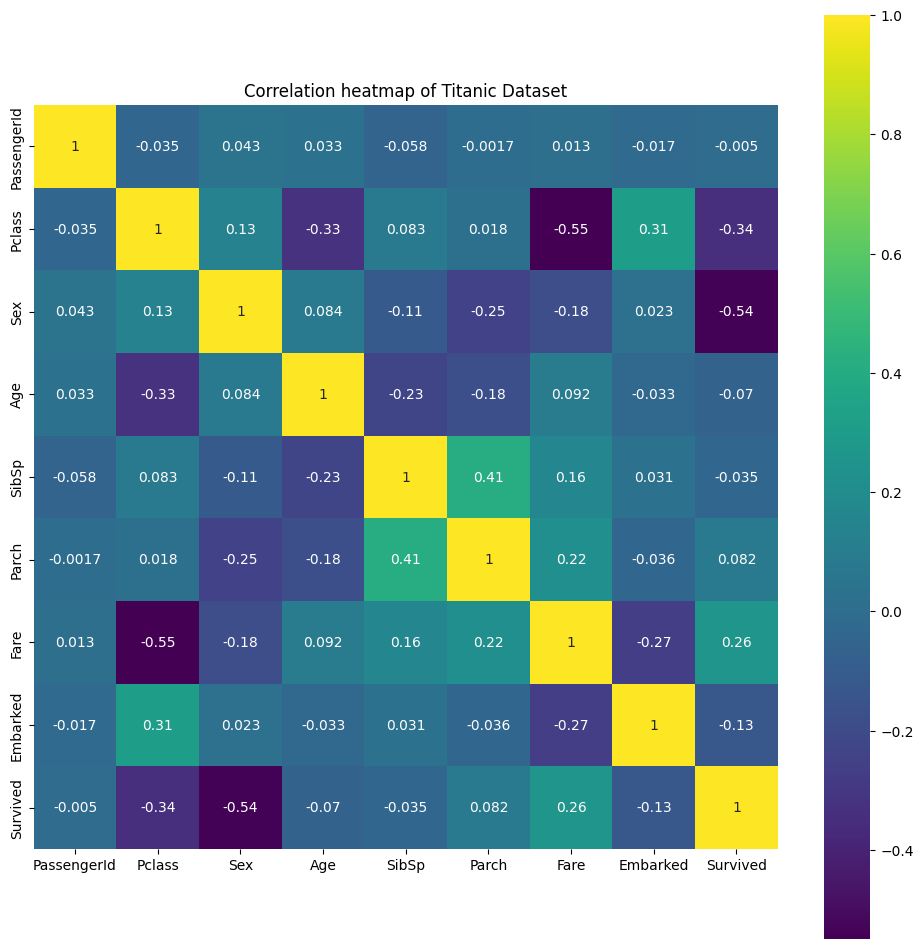

In [43]:
plt.figure(figsize=(12,12))
sns.heatmap(Titanic.corr(), vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Correlation heatmap of Titanic Dataset")
plt.show()

In [44]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked     891 non-null    float64
 8   Survived     891 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 62.8 KB


# **Boxplot**

<Axes: xlabel='Survived', ylabel='Age'>

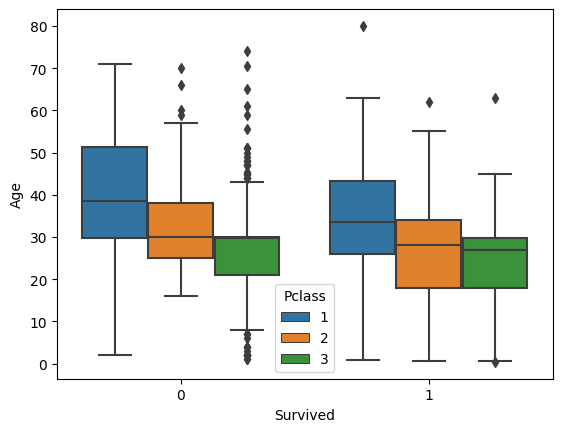

In [45]:
fig = plt.figure()
sns.boxplot(x='Survived', y='Age', hue='Pclass', data=Titanic)

# **Descriptive Analysis**

In [46]:
print(Titanic['Age'].describe())

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64


# **Inferential Statistics**

In [47]:
from scipy import stats

survivors = Titanic[Titanic['Survived'] == 1]['Age']
non_survivors = Titanic[Titanic['Survived'] == 0]['Age']
t_stat, p_val = stats.ttest_ind(survivors, non_survivors, nan_policy='omit')
print("t-statistic:", t_stat, "p-value:", p_val)


t-statistic: -2.0865081090373168 p-value: 0.03721708372685034


# **Correlation Analysis**

In [48]:
correlation = Titanic['Fare'].corr(Titanic['Survived'])
print("Correlation between Fare and Survival:", correlation)

Correlation between Fare and Survival: 0.2573065223849625


# **Predictive Analysis**

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = Titanic[['Pclass', 'Sex', 'Age', 'Fare']]
y = Titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))


Accuracy: 0.7910447761194029


# **Exploratory Data Analysis (EDA)**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


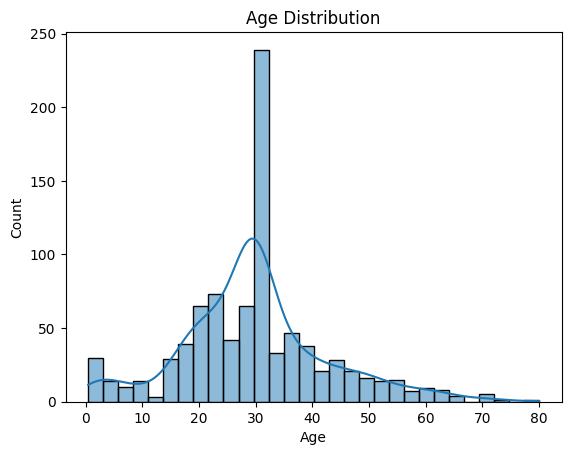

In [50]:
sns.histplot(Titanic['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# **Multivariate Analysis**

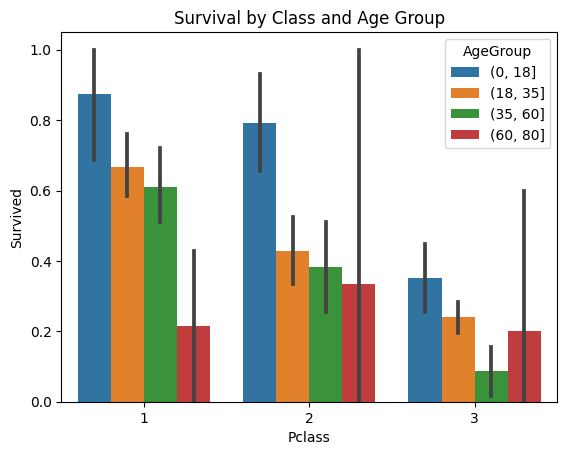

In [51]:
Titanic['AgeGroup'] = pd.cut(Titanic['Age'], bins=[0, 18, 35, 60, 80])
sns.barplot(x='Pclass', y='Survived', hue='AgeGroup', data=Titanic)
plt.title('Survival by Class and Age Group')
plt.show()

checking null values

In [52]:
Titanic = Titanic.drop(columns = ['AgeGroup'], axis=1)

In [53]:
Titanic.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Survived       0
dtype: int64

# Finding outliers

In [54]:
Titanic1 = Titanic[(Titanic['Pclass']==3) & (Titanic['Survived']==0)]
perAge = np.percentile(Titanic['Age'],[0,25,50,75,100])
IQR = perAge[3]-perAge[1]
upperAge = perAge[3]+IQR*1.5
lowerAge = perAge[1]-IQR*1.5
print(Titanic1.loc[(Titanic1['Age'] > upperAge) | (Titanic1['Age'] < lowerAge), 'Age'])

7       2.0
16      2.0
94     59.0
116    70.5
119     2.0
152    55.5
164     1.0
205     2.0
280    65.0
326    61.0
386     1.0
642     2.0
824     2.0
851    74.0
Name: Age, dtype: float64


In [55]:
Titanic1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  372 non-null    int64  
 1   Pclass       372 non-null    int64  
 2   Sex          372 non-null    int64  
 3   Age          372 non-null    float64
 4   SibSp        372 non-null    int64  
 5   Parch        372 non-null    int64  
 6   Fare         372 non-null    float64
 7   Embarked     372 non-null    float64
 8   Survived     372 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 29.1 KB


# **To remove outliers, use boolean indexing**

In [56]:

print(Titanic1.loc[(Titanic1['Age'] <= upperAge) & (Titanic1['Age'] >= lowerAge),'Age'])

0      22.000000
4      35.000000
5      29.699118
12     20.000000
13     39.000000
         ...    
882    22.000000
884    25.000000
885    39.000000
888    29.699118
890    32.000000
Name: Age, Length: 358, dtype: float64


In [57]:
Titanic1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  372 non-null    int64  
 1   Pclass       372 non-null    int64  
 2   Sex          372 non-null    int64  
 3   Age          372 non-null    float64
 4   SibSp        372 non-null    int64  
 5   Parch        372 non-null    int64  
 6   Fare         372 non-null    float64
 7   Embarked     372 non-null    float64
 8   Survived     372 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 29.1 KB


# **Machine Learning**

# **Coverting Pandas dataframe to spark environment**

In [58]:
from pyspark.sql.types import StructType, StructField, FloatType, IntegerType, StringType

schema = StructType([
    StructField("PassengerId",    IntegerType(), True),
    StructField("Pclass",         IntegerType(), True),
    StructField("Sex",            IntegerType(), True),
    StructField("Age",            FloatType(), True),
    StructField("SibSp",          IntegerType(), True),
    StructField("Parch",          IntegerType(), True),
    StructField("Fare",           FloatType(), True),
    StructField("Embarked",       FloatType(), True),
    StructField("Survived",       IntegerType(), True),
])
spark_Titanic_data = spark.createDataFrame(Titanic, schema=schema)

In [59]:
spark_Titanic_data.show()

+-----------+------+---+---------+-----+-----+-------+--------+--------+
|PassengerId|Pclass|Sex|      Age|SibSp|Parch|   Fare|Embarked|Survived|
+-----------+------+---+---------+-----+-----+-------+--------+--------+
|          1|     3|  1|     22.0|    1|    0|   7.25|     1.0|       0|
|          2|     1|  0|     38.0|    1|    0|71.2833|     0.0|       1|
|          3|     3|  0|     26.0|    0|    0|  7.925|     1.0|       1|
|          4|     1|  0|     35.0|    1|    0|   53.1|     1.0|       1|
|          5|     3|  1|     35.0|    0|    0|   8.05|     1.0|       0|
|          6|     3|  1|29.699118|    0|    0| 8.4583|     2.0|       0|
|          7|     1|  1|     54.0|    0|    0|51.8625|     1.0|       0|
|          8|     3|  1|      2.0|    3|    1| 21.075|     1.0|       0|
|          9|     3|  0|     27.0|    0|    2|11.1333|     1.0|       1|
|         10|     2|  0|     14.0|    1|    0|30.0708|     0.0|       1|
|         11|     3|  0|      4.0|    1|    1|   16

# **import libraries**

In [60]:
from pyspark.ml.feature import Tokenizer,StopWordsRemover, CountVectorizer,IDF,StringIndexer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vector
from pyspark.ml import Pipeline

In [61]:
Survived = StringIndexer(inputCol='Survived',outputCol='label')

# **combines two columns into a single vector column named 'features**

In [62]:
clean_up = VectorAssembler(inputCols=['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare'],outputCol='features')

# **build up pipeline combining the mentioned data preprocessing methods**

In [63]:
from pyspark.ml import Pipeline
Titanic_prep_pipe = Pipeline(stages=[clean_up,Survived])
cleaner = Titanic_prep_pipe.fit(spark_Titanic_data)
clean_data = cleaner.transform(spark_Titanic_data)

# **Feature Selection and Data Inspection**

In [64]:
clean_data = clean_data.select(['label','features'])
clean_data.show()

+-----+--------------------+
|label|            features|
+-----+--------------------+
|  0.0|[1.0,3.0,1.0,22.0...|
|  1.0|[2.0,1.0,0.0,38.0...|
|  1.0|[3.0,3.0,0.0,26.0...|
|  1.0|[4.0,1.0,0.0,35.0...|
|  0.0|[5.0,3.0,1.0,35.0...|
|  0.0|[6.0,3.0,1.0,29.6...|
|  0.0|[7.0,1.0,1.0,54.0...|
|  0.0|[8.0,3.0,1.0,2.0,...|
|  1.0|[9.0,3.0,0.0,27.0...|
|  1.0|[10.0,2.0,0.0,14....|
|  1.0|[11.0,3.0,0.0,4.0...|
|  1.0|[12.0,1.0,0.0,58....|
|  0.0|[13.0,3.0,1.0,20....|
|  0.0|[14.0,3.0,1.0,39....|
|  0.0|[15.0,3.0,0.0,14....|
|  1.0|[16.0,2.0,0.0,55....|
|  0.0|[17.0,3.0,1.0,2.0...|
|  1.0|[18.0,2.0,1.0,29....|
|  0.0|[19.0,3.0,0.0,31....|
|  1.0|[20.0,3.0,0.0,29....|
+-----+--------------------+
only showing top 20 rows



# **Split the data into training and test sets (70/30%)**

In [65]:
(training,testing) = clean_data.randomSplit([0.7,0.3])

# **import machine learning method**

In [66]:
from pyspark.ml.classification import NaiveBayes
NB = NaiveBayes()
predictor = NB.fit(training)

# **Test the model on testing data**

In [67]:
test_results = predictor.transform(testing)
test_results.show()

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|[8.0,3.0,1.0,2.0,...|[-123.09724653150...|[1.34321645929539...|       1.0|
|  0.0|[15.0,3.0,0.0,14....|[-81.843668372723...|[0.08338001527234...|       1.0|
|  0.0|[25.0,3.0,0.0,8.0...|[-135.48591998458...|[2.62782777822778...|       1.0|
|  0.0|[27.0,3.0,1.0,29....|[-131.35989500831...|[0.86633694704227...|       0.0|
|  0.0|[28.0,1.0,1.0,19....|[-931.44513752276...|[1.80354728867518...|       1.0|
|  0.0|[31.0,1.0,1.0,40....|[-214.49966291940...|[5.49752106253402...|       1.0|
|  0.0|[41.0,3.0,0.0,40....|[-169.18118195023...|[0.81174945375144...|       0.0|
|  0.0|[42.0,2.0,0.0,27....|[-164.13412610913...|[3.68123348863302...|       1.0|
|  0.0|[50.0,3.0,0.0,18....|[-135.24929947523...|[3.54196606643087...|       1.0|
|  0.0|[61.0,3.0

# **Use the  MulticlassClassificationEvaluator function to extract more meaning out of the results.**

In [68]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
acc_eval = MulticlassClassificationEvaluator()
acc = acc_eval.evaluate(test_results)
print("Accuracy of model at predicting Survival: {}".format(acc))

Accuracy of model at predicting Survival: 0.6157498696765713


# **Extract prediction and ground truth label from test_results**

In [69]:
PredicationAndLabel = test_results['prediction','label']
PredicationAndLabel.show()

+----------+-----+
|prediction|label|
+----------+-----+
|       1.0|  0.0|
|       1.0|  0.0|
|       1.0|  0.0|
|       0.0|  0.0|
|       1.0|  0.0|
|       1.0|  0.0|
|       0.0|  0.0|
|       1.0|  0.0|
|       1.0|  0.0|
|       0.0|  0.0|
|       1.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       1.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       1.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
+----------+-----+
only showing top 20 rows



# **Import multiclassmetrics for precision, recall,accuracy and confusion matrix calculation**

In [70]:
from pyspark.mllib.evaluation import MulticlassMetrics
multi_metrics = MulticlassMetrics(PredicationAndLabel.rdd)
precision_score = multi_metrics.weightedPrecision
recall_score = multi_metrics.weightedRecall
accuracy_score = multi_metrics.accuracy
print(recall_score)
print(precision_score)
print(accuracy_score)
multi_metrics.confusionMatrix().toArray()

/opt/conda/lib/python3.10/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


0.6363636363636364
0.6152932888007515
0.6363636363636364


array([[141.,  33.],
       [ 67.,  34.]])

# Classification with logistic regression

# **Import machine learning method logistic regression for classification**

In [71]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression()
titanic_data_predictor_lr = lr.fit(training)

# **Test the logistic regression model on testing data**

In [72]:
test_results = titanic_data_predictor_lr.transform(testing)
test_results.show()

+-----+--------------------+--------------------+--------------------+----------+
|label|            features|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------------+--------------------+----------+
|  0.0|[8.0,3.0,1.0,2.0,...|[2.26906373541905...|[0.90628229665849...|       0.0|
|  0.0|[15.0,3.0,0.0,14....|[-1.3719995811906...|[0.20229697610537...|       1.0|
|  0.0|[25.0,3.0,0.0,8.0...|[-0.2740712536488...|[0.43190788251652...|       1.0|
|  0.0|[27.0,3.0,1.0,29....|[2.31623171558294...|[0.91021245049465...|       0.0|
|  0.0|[28.0,1.0,1.0,19....|[-0.7177587099506...|[0.32788672108349...|       1.0|
|  0.0|[31.0,1.0,1.0,40....|[0.28481839241746...|[0.57072711903068...|       0.0|
|  0.0|[41.0,3.0,0.0,40....|[0.46791933104819...|[0.61489117187492...|       0.0|
|  0.0|[42.0,2.0,0.0,27....|[-1.5087276621933...|[0.18112743009914...|       1.0|
|  0.0|[50.0,3.0,0.0,18....|[-0.7375777521537...|[0.32353404959968...|       1.0|
|  0.0|[61.0,3.0

# **Use the  MulticlassClassificationEvaluator function to extract more meaning out of the results.**

In [73]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
acc_eval = MulticlassClassificationEvaluator()
acc = acc_eval.evaluate(test_results)
print("Accuracy of model Survivors was: {}".format(acc))

Accuracy of model Survivors was: 0.7685879033247454


# **Extract prediction and ground truth label from test_results**

In [74]:
PredicationAndLabel = test_results['prediction','label']
PredicationAndLabel.show()

+----------+-----+
|prediction|label|
+----------+-----+
|       0.0|  0.0|
|       1.0|  0.0|
|       1.0|  0.0|
|       0.0|  0.0|
|       1.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       1.0|  0.0|
|       1.0|  0.0|
|       0.0|  0.0|
|       1.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       1.0|  0.0|
|       0.0|  0.0|
|       1.0|  0.0|
+----------+-----+
only showing top 20 rows



# **Import multiclassmetrics for precision, recall, and confusion matrix calculation**

In [75]:
from pyspark.mllib.evaluation import MulticlassMetrics
multi_metrics = MulticlassMetrics(PredicationAndLabel.rdd)
precision_score = multi_metrics.weightedPrecision
recall_score = multi_metrics.weightedRecall
accuracy_score = multi_metrics.accuracy
print(recall_score)
print(precision_score)
print(accuracy_score)
multi_metrics.confusionMatrix().toArray()

0.7672727272727273
0.7706432819516932
0.7672727272727272


array([[139.,  35.],
       [ 29.,  72.]])